In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/My Drive/xx/clean_data_end.csv'
# this is the place that we mounted our drive. From the previous notebook we saved the clean data to the csv above.
CleanedData = pd.read_csv(file_path, delimiter=',')



In [3]:
CleanedData.columns

Index(['YEAR', 'MONTH', 'CITY', 'REALSUM', 'ROOM_TYPE', 'HOST_IS_SUPERHOST',
       'MULTI', 'BIZ', 'GUEST_SATISFACTION_OVERALL', 'BEDROOMS', 'DIST', 'LNG',
       'LAT', 'CLEANLINESS_RATING', 'HOST_RESPONSE_TIME', 'REVIEWS_PER_MONTH'],
      dtype='object')

In [4]:
# We need to preprocess data to get mean values for both Revenue data and satisfaction data.
# The following cell is written by this purpose.

YesRealsumData = CleanedData["REALSUM"].where(CleanedData["BIZ"] == 'yes')
NoRealsumData = CleanedData["REALSUM"].where(CleanedData["BIZ"] == 'no')

YesSatisfactionData = CleanedData["GUEST_SATISFACTION_OVERALL"].where(CleanedData["BIZ"] == 'yes')
NoSatisfactionData = CleanedData["GUEST_SATISFACTION_OVERALL"].where(CleanedData["BIZ"] == 'no')

YesRealsumMean = YesRealsumData.mean()
NoRealsumMean = NoRealsumData.mean()

YesSatisfactionMean = YesSatisfactionData.mean()
NoSatisfactionMean = NoSatisfactionData.mean()


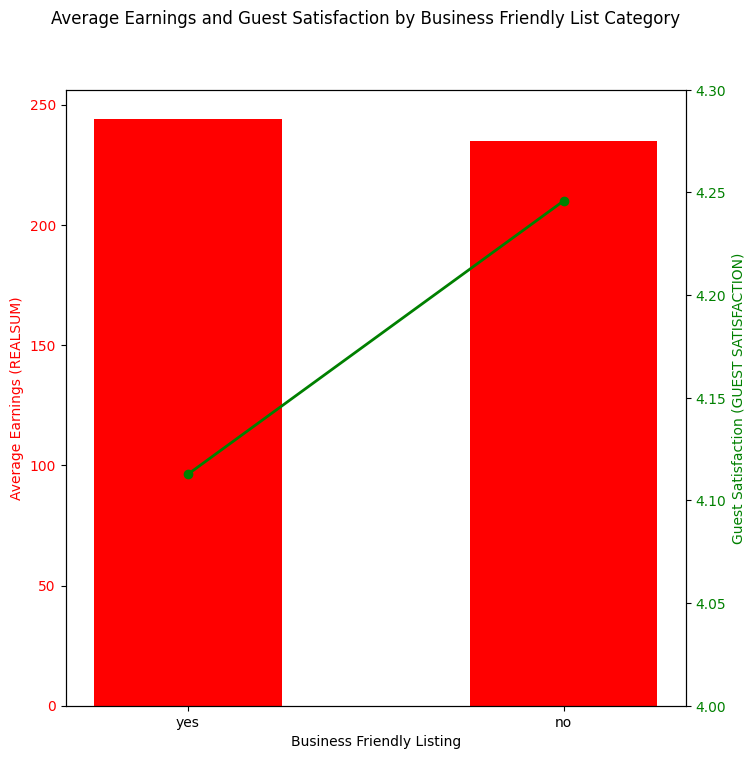

In [5]:
import matplotlib.pyplot

# Lets create needed lists so that we can use in axis of the plots we needed.
# These will be the mean values that we calculated in the previous cell.
Categories = ['yes', 'no']
RealsumMeans = [YesRealsumMean, NoRealsumMean]
SatisfactionMeans = [YesSatisfactionMean, NoSatisfactionMean]

# Creating the dual Y-axis chart
Figure, RealsumAxis = matplotlib.pyplot.subplots(figsize=(8, 8))

# We will have 2 separate y axises to show both Guest satisfaction and average earning.
# this is the first axis which is the business friendly listing vs average earnings.
# I decided to choose color red with bar chart to create distinction
RealsumAxis.set_xlabel('Business Friendly Listing')
RealsumAxis.set_ylabel('Average Earnings (REALSUM)', color='red')
RealsumAxis.bar(Categories, RealsumMeans, width=0.5, color='red', label='Average Earnings (REALSUM)')
RealsumAxis.tick_params(axis='y', labelcolor='red')
# I decided to choose color green with tick params for better visibility on gues satisfiction.
SatisfactionAxis=RealsumAxis.twinx()
SatisfactionAxis.set_ylabel('Guest Satisfaction (GUEST SATISFACTION)', color='green')
SatisfactionAxis.plot(Categories, SatisfactionMeans, color='green', marker='o', label='Guest Satisfaction (GUEST SATISFACTION)', linewidth=2)
SatisfactionAxis.tick_params(axis='y', labelcolor='green')
# this is used for better visualization on y axis for the second axis.
# the first axis steps were 50, 100, 150 etc. so this is only applied to second axis.
SatisfactionAxis.set_ylim(4, 4.3)
Figure.suptitle('Average Earnings and Guest Satisfaction by Business Friendly List Category')
matplotlib.pyplot.show()
